<a href="https://colab.research.google.com/github/gittimos/covid-19/blob/master/Covid_19_(public).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading libraries and data

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [0]:
# Load data from Github (2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
df1 = pd.read_csv(url)

In [0]:
# create dataframe with data for Italy and Germany
start = 33 # index of start element in time series
df2 = df1.loc[df1["Country/Region"].isin(["Italy", "Germany"])].iloc[:,start:].T
df2 = df2.iloc[:-1,:] # no data update for 3/12/20
df2.columns = ["Germany","Italy"]

In [0]:
# Create third time series with shifted data from Germany for comparison
delta_t = 8 # offset of the time series for comparison
df2["Germany shifted 8 days"] = df2.Germany.shift(-delta_t)

# Plotting the data

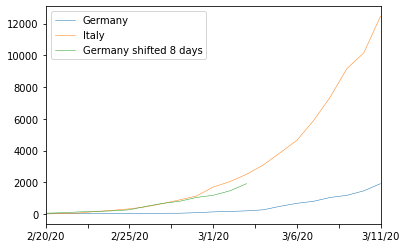

In [9]:
df2.plot(linewidth=0.5)

# Plotting the logarithm

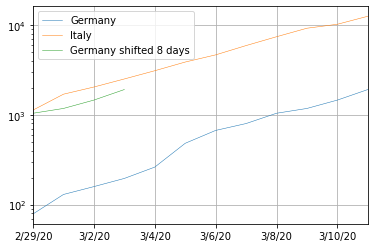

In [10]:
start_log = 9 # start with the more linear part of the log data
df2.iloc[start_log:,:].plot(linewidth=0.5,logy=True,grid=True)

# Seven day growth

Growth of cases in Germany in the last seven days.

In [19]:
df2.Germany[-1], df2.Germany[-8], df2.Germany[-1]/df2.Germany[-8]

(1908, 262, 7.282442748091603)

Growth of cases in Italy in the last seven days.

In [20]:
df2.Italy[-1], df2.Italy[-8], df2.Italy[-1]/df2.Italy[-8]

(12462, 3089, 4.034315312398834)